In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [2]:
# Load the dataset
training_data = pd.read_csv('Dataset/twitter_training.csv')

## Basic Data Preprocessing

In [3]:
# Rename columns for clarity
training_data.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

# Drop rows where the tweet text is missing
training_data_cleaned = training_data.dropna(subset=['Tweet'])

# Setting the visual appearance of the plots
sns.set_style("whitegrid")

## Basic Data Visualization

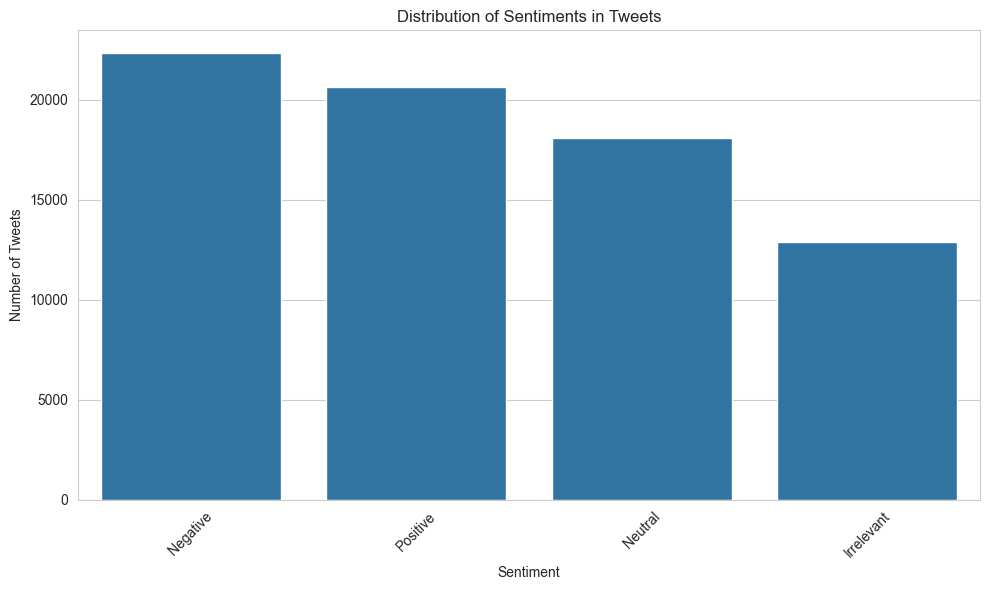

In [4]:
# Plotting the distribution of sentiments in the dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=training_data_cleaned, x='Sentiment', order = training_data_cleaned['Sentiment'].value_counts().index)
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

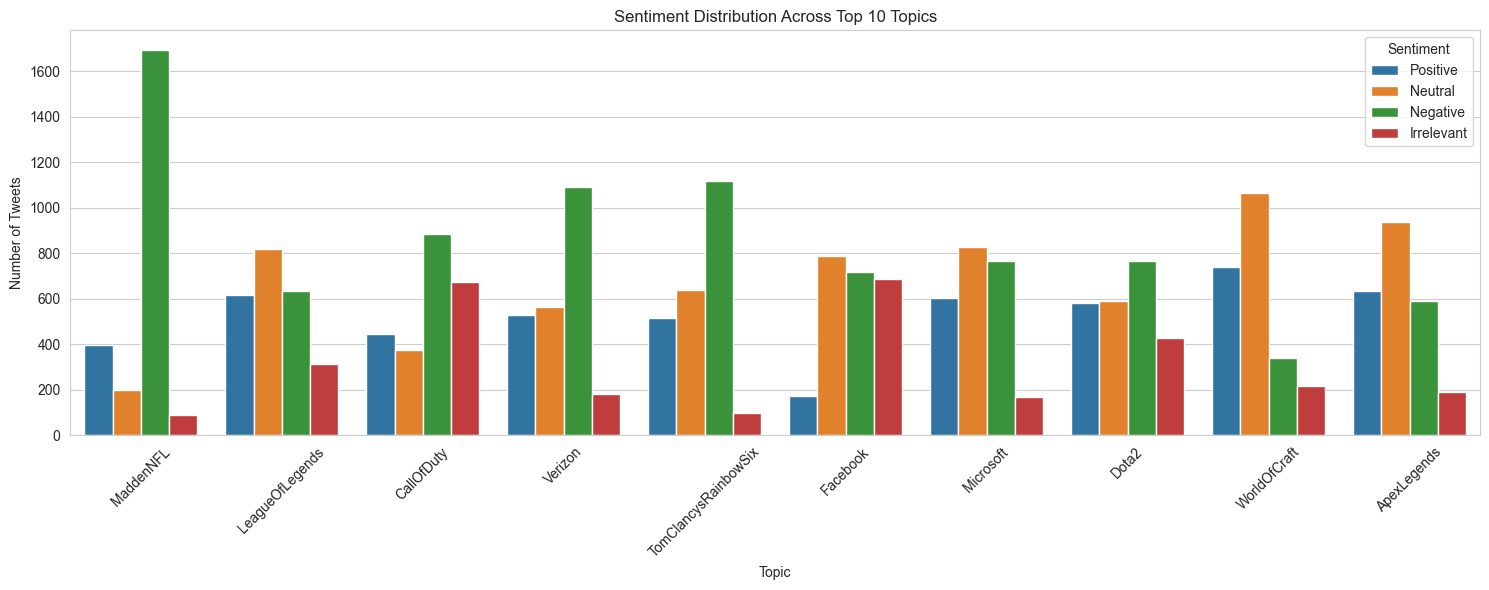

In [6]:
# Sentiment Distribution Across Different Topics
plt.figure(figsize=(15, 6))
sns.countplot(data=training_data_cleaned, x='Topic', hue='Sentiment', order = training_data_cleaned['Topic'].value_counts().iloc[:10].index)
plt.title('Sentiment Distribution Across Top 10 Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

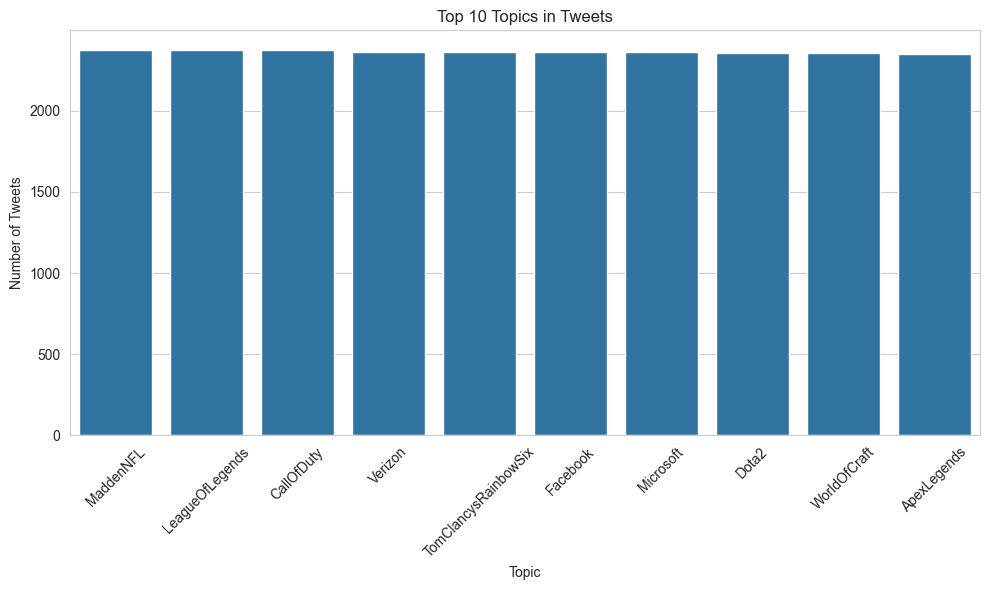

In [5]:
# Top Topics in the Dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=training_data_cleaned, x='Topic', order = training_data_cleaned['Topic'].value_counts().iloc[:10].index)
plt.title('Top 10 Topics in Tweets')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Advanced Data Analysis and Visualization

In [7]:
# Ensure we have NLTK data downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jiten\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

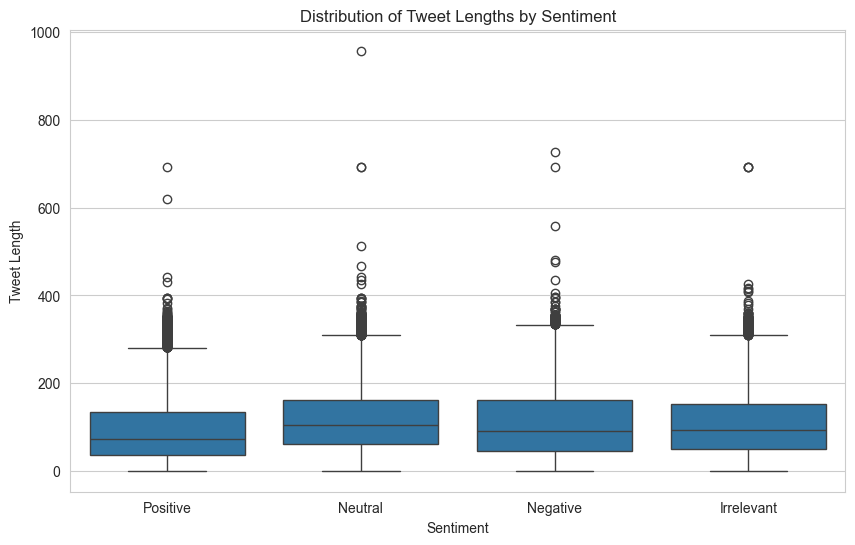

In [20]:
import warnings
warnings.filterwarnings('ignore')
# Length of Tweets
training_data_cleaned['Tweet Length'] = training_data_cleaned['Tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Tweet Length', data=training_data_cleaned)
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

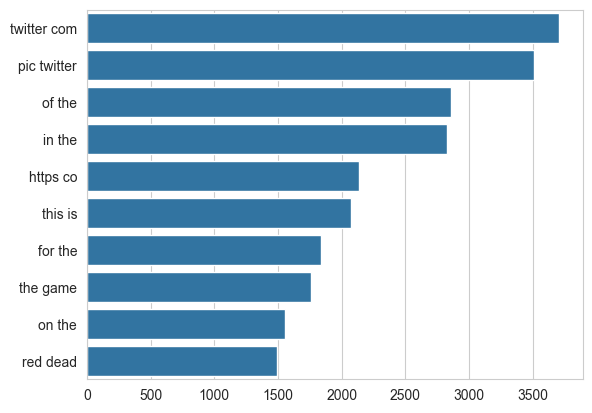

In [9]:
# N-gram Analysis
def plot_top_ngrams(corpus, n=None, ngrams=2):
    vec = CountVectorizer(ngram_range=(ngrams, ngrams)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_n_bigrams = words_freq[:n]
    x, y = map(list,zip(*top_n_bigrams))
    sns.barplot(x=y, y=x)
    plt.show()

plot_top_ngrams(training_data_cleaned['Tweet'], n=10, ngrams=2)

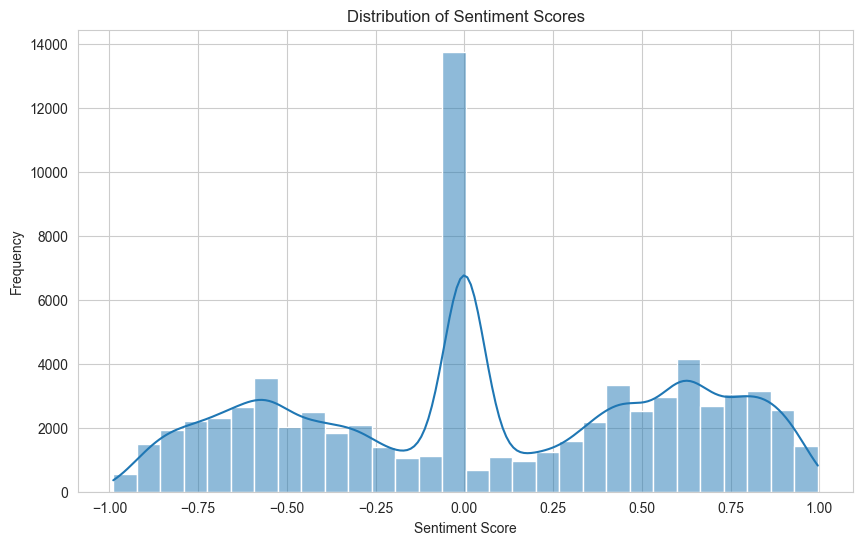

In [19]:
import warnings
warnings.filterwarnings('ignore')
# Sentiment Intensity Analysis
sid = SentimentIntensityAnalyzer()
training_data_cleaned['Sentiment Score'] = training_data_cleaned['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])
plt.figure(figsize=(10, 6))
sns.histplot(training_data_cleaned, x='Sentiment Score', bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## Topic-Specific Analysis and Visualization

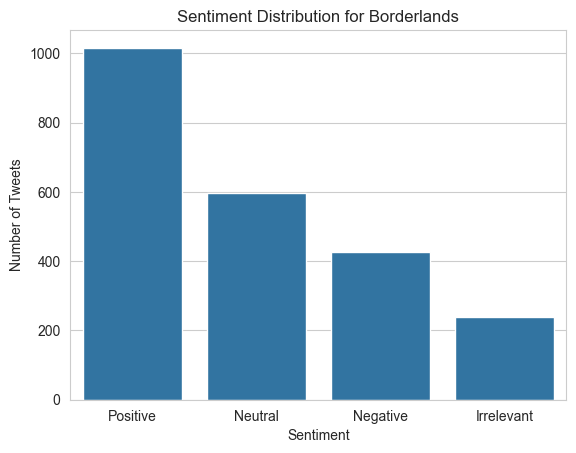

In [11]:
# Topic-Specific Sentiment Distribution
selected_topics = ['Borderlands'] 
for topic in selected_topics:
    subset = training_data_cleaned[training_data_cleaned['Topic'] == topic]
    sns.countplot(data=subset, x='Sentiment')
    plt.title(f'Sentiment Distribution for {topic}')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.show()

## Additional Visualizations

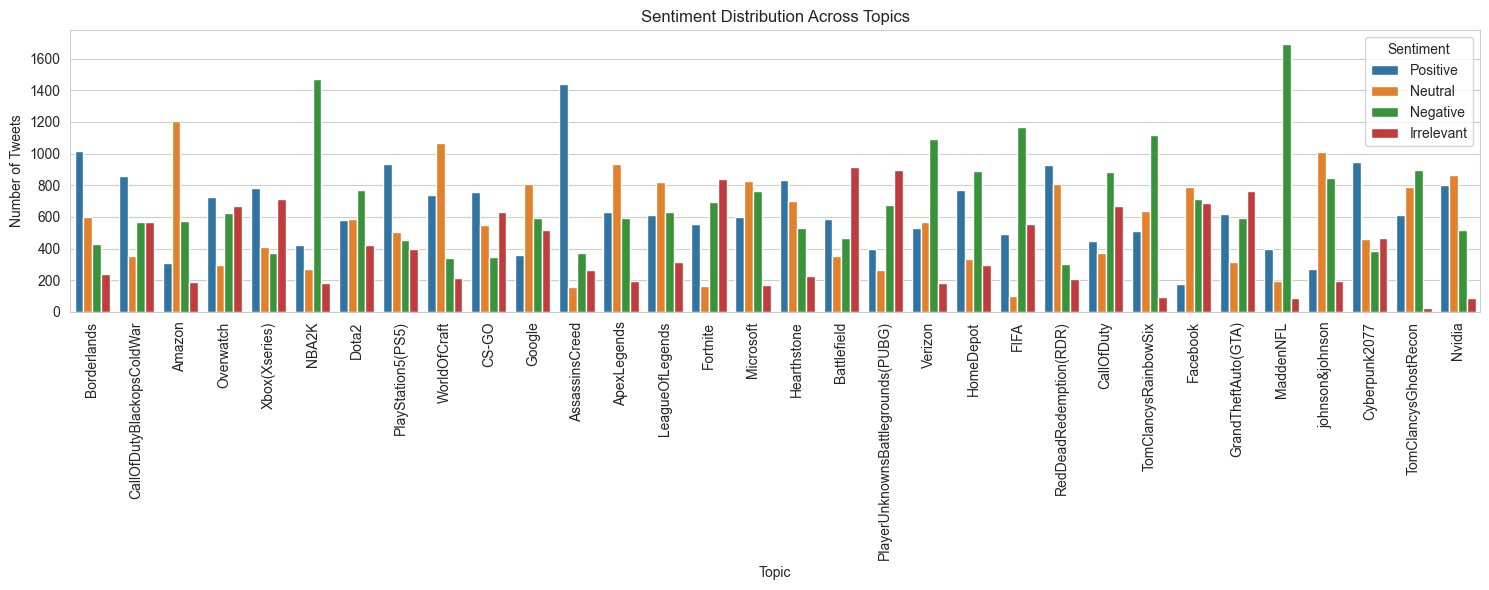

In [12]:
# Sentiment Distribution Across Topics
plt.figure(figsize=(15, 6))
sns.countplot(data=training_data_cleaned, x='Topic', hue='Sentiment')
plt.title('Sentiment Distribution Across Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

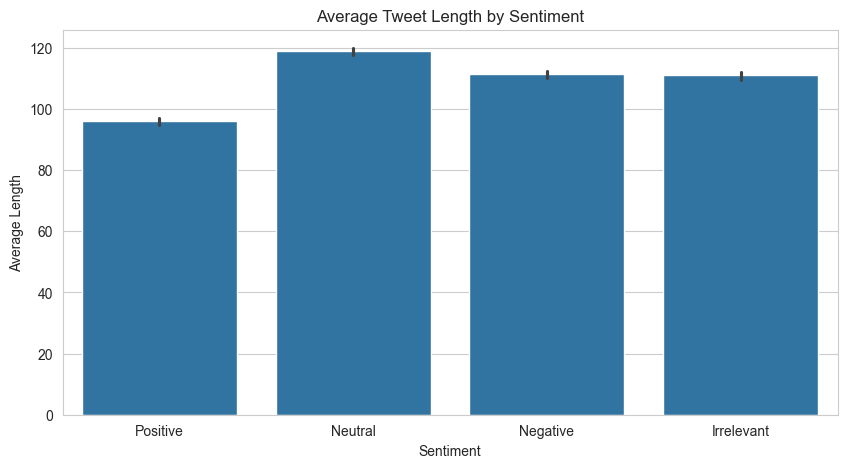

In [18]:
import warnings
warnings.filterwarnings('ignore')
# Average Tweet Length by Sentiment
training_data_cleaned['Tweet_Length'] = training_data_cleaned['Tweet'].apply(len)
plt.figure(figsize=(10, 5))
sns.barplot(x='Sentiment', y='Tweet_Length', data=training_data_cleaned)
plt.title('Average Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Length')
plt.show()

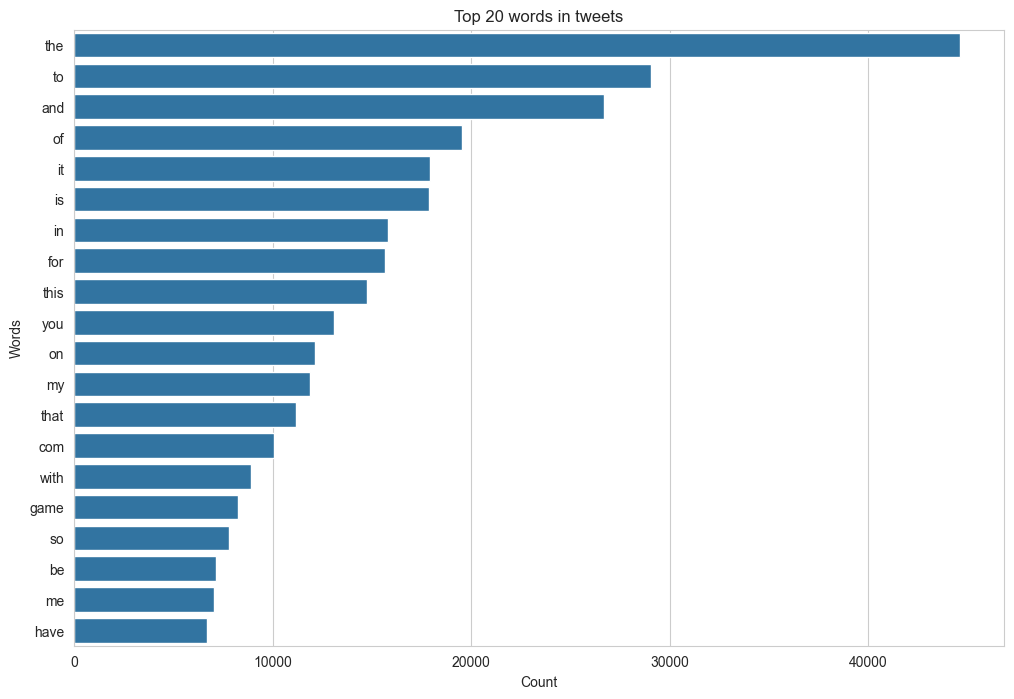

In [14]:
# Most Frequent Words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(training_data_cleaned['Tweet'], 20)
df_common_words = pd.DataFrame(common_words, columns=['Tweet', 'count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='Tweet', data=df_common_words)
plt.title('Top 20 words in tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

## Final Visualizations

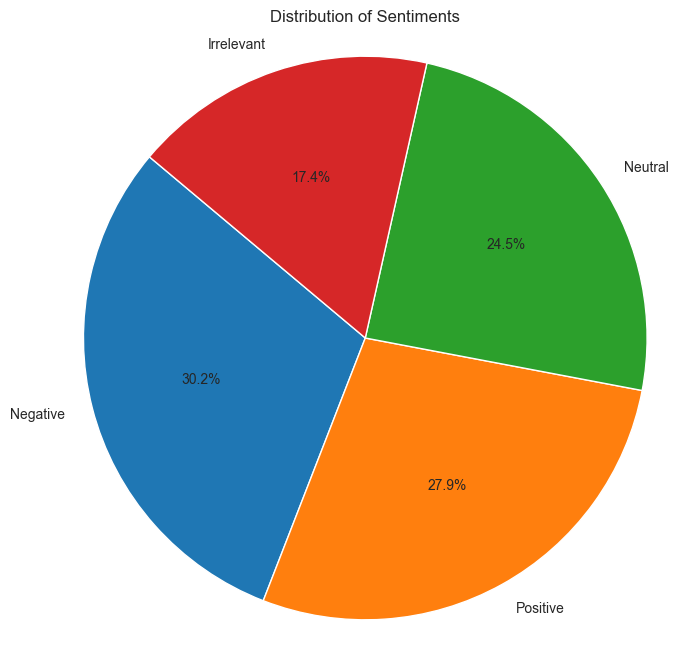

In [15]:
# Pie Chart for Sentiment Distribution
sentiment_counts = training_data_cleaned['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

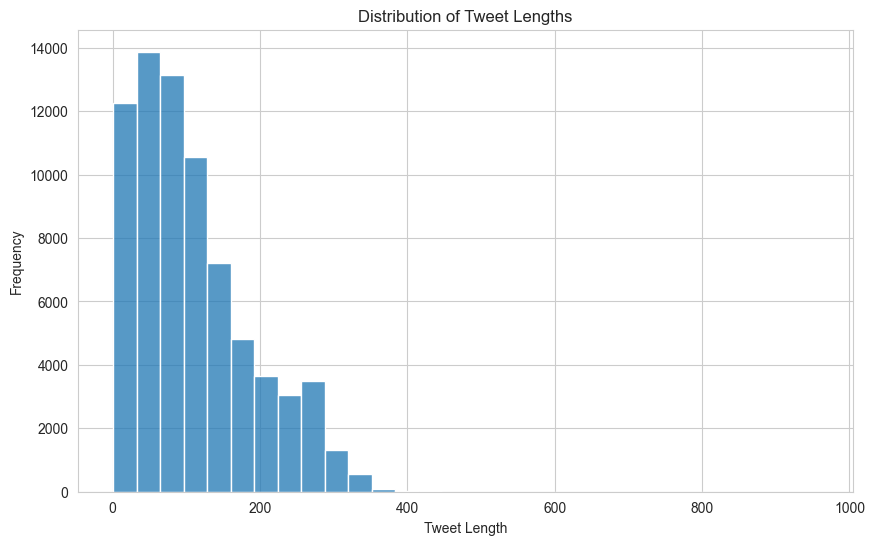

In [17]:
import warnings
warnings.filterwarnings('ignore')
# Histogram of Tweet Lengths
training_data_cleaned['Tweet_Length'] = training_data_cleaned['Tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(training_data_cleaned['Tweet_Length'], bins=30)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# End of Script